# Airline Passenger Satisfaction Analysis

## I. Overview
This project uses various classification modeling to predict the airline passenger satisfaction after the flight journey.

## II. Business Problem
- How to improve airline customer experience?
***
### Question to Consider:

## III. Data Understanding

In [1]:
import pandas as pd
pd.options.display.max_columns = 25
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df_train = pd.read_csv('data/train.csv', index_col=0) # Treat the "Unnamed: 0" as the index column
display(df_train.shape)
display(df_train.head())
display(df_train.info())

(103904, 24)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
id                                   103904 non-null int64
Gender                               103904 non-null object
Customer Type                        103904 non-null object
Age                                  103904 non-null int64
Type of Travel                       103904 non-null object
Class                                103904 non-null object
Flight Distance                      103904 non-null int64
Inflight wifi service                103904 non-null int64
Departure/Arrival time convenient    103904 non-null int64
Ease of Online booking               103904 non-null int64
Gate location                        103904 non-null int64
Food and drink                       103904 non-null int64
Online boarding                      103904 non-null int64
Seat comfort                         103904 non-null int64
Inflight entertainment               103904 non-null int64


None

In [3]:
df_test = pd.read_csv('data/test.csv', index_col=0) # Treat the "Unnamed: 0" as the index column
display(df_test.shape)
display(df_test.head())
display(df_test.info())

(25976, 24)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied


<class 'pandas.core.frame.DataFrame'>
Int64Index: 25976 entries, 0 to 25975
Data columns (total 24 columns):
id                                   25976 non-null int64
Gender                               25976 non-null object
Customer Type                        25976 non-null object
Age                                  25976 non-null int64
Type of Travel                       25976 non-null object
Class                                25976 non-null object
Flight Distance                      25976 non-null int64
Inflight wifi service                25976 non-null int64
Departure/Arrival time convenient    25976 non-null int64
Ease of Online booking               25976 non-null int64
Gate location                        25976 non-null int64
Food and drink                       25976 non-null int64
Online boarding                      25976 non-null int64
Seat comfort                         25976 non-null int64
Inflight entertainment               25976 non-null int64
On-board service 

None

In [4]:
total_rows = df_train.shape[0] + df_test.shape[0]
test_df_size = df_test.shape[0] / total_rows
print(test_df_size)

0.2


Data source https://www.kaggle.com/teejmahal20/airline-passenger-satisfaction

### Note:
The datasets acquired from kaggel contain train and test sets which have been already split into 80/20. For analysis (ML) purpose, I will combine those two datasets.

In [5]:
df = pd.concat([df_train, df_test]).reset_index(drop=True)
display(df.shape)
display(df.head())
display(df.info())

(129880, 24)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
id                                   129880 non-null int64
Gender                               129880 non-null object
Customer Type                        129880 non-null object
Age                                  129880 non-null int64
Type of Travel                       129880 non-null object
Class                                129880 non-null object
Flight Distance                      129880 non-null int64
Inflight wifi service                129880 non-null int64
Departure/Arrival time convenient    129880 non-null int64
Ease of Online booking               129880 non-null int64
Gate location                        129880 non-null int64
Food and drink                       129880 non-null int64
Online boarding                      129880 non-null int64
Seat comfort                         129880 non-null int64
Inflight entertainment               129880 non-null int64


None

### Description for each columns' abbreviation
- <b>Gender</b> - Gender of the passengers (Female, Male)
- <b>Customer Type</b> - The customer type (Loyal customer, disloyal customer)
- <b>Age</b> - The actual age of the passengers
- <b>Type of Travel</b>: Purpose of the flight of the passengers (Personal Travel, Business Travel)
- <b>Class</b> - Travel class in the plane of the passengers (Business, Eco, Eco Plus)
- <b>Flight distance</b> - The flight distance of this journey
- <b>Inflight wifi service</b> - Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)
- <b>Departure/Arrival time convenient</b> - Satisfaction level of Departure/Arrival time convenient
- <b>Ease of Online booking</b> - Satisfaction level of online booking
- <b>Gate location</b> - Satisfaction level of Gate location
- <b>Food and drink</b> - Satisfaction level of Food and drink
- <b>Online boarding</b> - Satisfaction level of online boarding
- <b>Seat comfort</b> - Satisfaction level of Seat comfort
- <b>Inflight entertainment</b> - Satisfaction level of inflight entertainment
- <b>On-board service</b> - Satisfaction level of On-board service
- <b>Leg room service</b> - Satisfaction level of Leg room service
- <b>Baggage handling</b> - Satisfaction level of baggage handling
- <b>Check-in service</b> - Satisfaction level of Check-in service
- <b>Inflight service</b> - Satisfaction level of inflight service
- <b>Cleanliness</b> - Satisfaction level of Cleanliness
- <b>Departure Delay in Minutes</b> - Minutes delayed when departure
- <b>Arrival Delay in Minutes</b> - Minutes delayed when Arrival
- <b>Satisfaction</b> - Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

In [6]:
df.isna().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

>**Insight:** 
- No need to worried about duplicates (same customer can multiple journey at different time)
- `Gender`, `Customer Type`, `Type of Travel`, and `Class` are columns
- continuous columns
- From `Inflight wifi service` ... to ... `Cleanliness`, these columns are all survey response based on a 1 to 5 scale
- Only `Arrival Delay in Minutes` contains null value 

### Target Variable - `satisfaction`

In [7]:
df['satisfaction'].value_counts(normalize=True)

neutral or dissatisfied    0.565537
satisfied                  0.434463
Name: satisfaction, dtype: float64

- Binary classifiers
- No imbalance issue

### Predictor Variables

### Categorical Columns

In [8]:
val_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
for col in val_cols:
    display(df[col].value_counts(normalize=True))

Female    0.507384
Male      0.492616
Name: Gender, dtype: float64

Loyal Customer       0.816908
disloyal Customer    0.183092
Name: Customer Type, dtype: float64

Business travel    0.690584
Personal Travel    0.309416
Name: Type of Travel, dtype: float64

Business    0.478596
Eco         0.448945
Eco Plus    0.072459
Name: Class, dtype: float64

- Pretty balanced female and male ratio
- More Loyal customers than disloyal customers
- More business travels than personal travels
- Eco Plus Class only counts for a small part

### Continuous Columns

In [10]:
cont_cols = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
df[cont_cols].describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1190.316392,14.713713,15.091129
std,15.119360,997.452477,38.071126,38.465650
min,7.000000,31.000000,0.000000,0.000000
25%,27.000000,414.000000,0.000000,0.000000
50%,40.000000,844.000000,0.000000,0.000000
75%,51.000000,1744.000000,12.000000,13.000000
max,85.000000,4983.000000,1592.000000,1584.000000


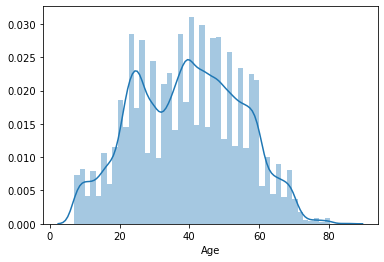

In [13]:
sns.distplot(df['Age'])
plt.show()

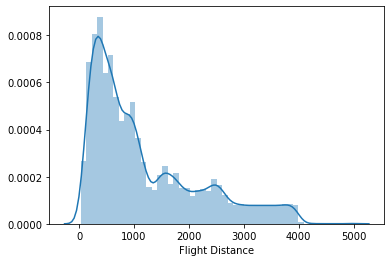

In [14]:
sns.distplot(df['Flight Distance'])
plt.show()

- `Departure Delay in Minutes` and `Arrival Delay in Minutes` can be changed into binary columns

flight length -https://en.wikipedia.org/wiki/Flight_length#:~:text=Route%20category%20lengths%20tend%20to,haul%20as%20being%20in%2Dbetween.

- may be change flight distance to short, medium and long haul?
- departure delay less than 10 minues => not significant delay
- arrival delay less than 10 minutes => not significant delay

In [41]:
df.loc[df['Departure Delay in Minutes'] <= 10].count()

id                                   95128
Gender                               95128
Customer Type                        95128
Age                                  95128
Type of Travel                       95128
Class                                95128
Flight Distance                      95128
Inflight wifi service                95128
Departure/Arrival time convenient    95128
Ease of Online booking               95128
Gate location                        95128
Food and drink                       95128
Online boarding                      95128
Seat comfort                         95128
Inflight entertainment               95128
On-board service                     95128
Leg room service                     95128
Baggage handling                     95128
Checkin service                      95128
Inflight service                     95128
Cleanliness                          95128
Departure Delay in Minutes           95128
Arrival Delay in Minutes             94921
satisfactio

In [42]:
(129880-95128)/129880

0.2675700646750847

In [43]:
df.loc[df['Arrival Delay in Minutes'] <= 10].count()

id                                   93583
Gender                               93583
Customer Type                        93583
Age                                  93583
Type of Travel                       93583
Class                                93583
Flight Distance                      93583
Inflight wifi service                93583
Departure/Arrival time convenient    93583
Ease of Online booking               93583
Gate location                        93583
Food and drink                       93583
Online boarding                      93583
Seat comfort                         93583
Inflight entertainment               93583
On-board service                     93583
Leg room service                     93583
Baggage handling                     93583
Checkin service                      93583
Inflight service                     93583
Cleanliness                          93583
Departure Delay in Minutes           93583
Arrival Delay in Minutes             93583
satisfactio

In [40]:
df['Arrival Delay in Minutes'].isna().sum()

393

- null value only account for a small percent => fill the null value to 0

In [44]:
pd.DataFrame(df.groupby(['Class', 'satisfaction'])['satisfaction'].count())

satisfaction
Class    satisfaction                         
Business neutral or dissatisfied         18994
         satisfied                       43166
Eco      neutral or dissatisfied         47366
         satisfied                       10943
Eco Plus neutral or dissatisfied          7092
         satisfied                        2319

## IV. Data Preparation

## V. Modeling

## VI. Evaluation

## VII. Conclusion